In [5]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np


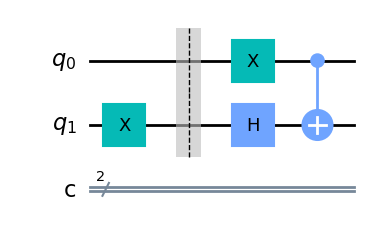

In [90]:
## middle parts

test_middle = QuantumCircuit(2, 2)

#test_middle.x(0)
test_middle.x(1)

test_middle.barrier()
test_middle.x(0)

test_middle.h(1)
test_middle.cx(0, 1)


#test_middle.measure([0, 1], [0,1])

test_middle.draw('mpl')


In [91]:
st = Statevector(test_middle)
st.draw('latex')

<IPython.core.display.Latex object>

In [107]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(test_middle, backend, shots=1)
job.result().get_counts()

{'01': 1}

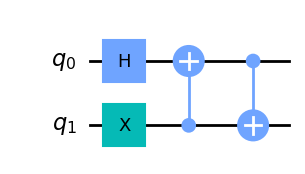

In [145]:
from math import pi

test_one = QuantumCircuit(2)

#test_one.x(0)

#test_one.x(0)

#test_one.cz(0, 1)

test_one.h(0)
test_one.x(1)

test_one.cx(1, 0)
test_one.cx(0, 1)


#test_one.h(0)
#test_one.h(1)
#test_one.cx(0, 1)


test_one.draw('mpl')

In [146]:
st = Statevector(test_one)
st.draw('latex')

<IPython.core.display.Latex object>

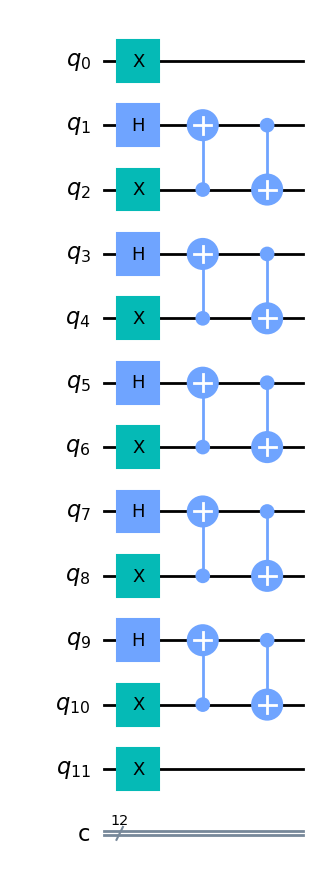

In [151]:
test_first_line = QuantumCircuit(12, 12)
test_first_line.x(0)
test_first_line.x(-1)


#test_first_line.h(list(range(1, 12)))

for i in range(1, 11, 2):
    test_first_line.h(i)
    test_first_line.x(i+1)

    test_first_line.cx(i+1, i)
    test_first_line.cx(i, i+1)


test_first_line.draw("mpl")

In [152]:
st = Statevector(test_first_line)
st.draw('latex')

<IPython.core.display.Latex object>

In [157]:
class Map:
    def __init__(self):
    
        self.total_qubits = 12
        self.total_bits = 12
        self.circuit = QuantumCircuit(self.total_qubits, self.total_bits)

        self.actual_states = list(np.zeros(self.total_qubits, dtype=np.int8))

        self.map = []

        self.simulator = BasicAer.get_backend('qasm_simulator')

        # private attributes
        zero_basis = [1, 0]
        one_basis = [0, 1]
        basis_states = [zero_basis, one_basis]
    
    def update_states_list(self, states):
        self.actual_states = states
    
    
    def initialize_map(self):
        self.circuit.x(0)
        self.circuit.x(-1)
        
        for qubit in range(1, self.total_qubits-1, 2):
            self.circuit.h(qubit)
            self.circuit.x(qubit+1)

            self.circuit.cx(qubit+1, qubit)
            self.circuit.cx(qubit, qubit+1)
        
    
    def create_measurements(self):
        total_qbits_to_measure = list(range(self.total_qubits))
        total_bits_to_measure = list(range(self.total_bits))
        self.circuit.measure(total_bits_to_measure, total_bits_to_measure)
        
    
    def save_simulation_results(self):
        simulation_result = self.get_simulation_result()
        self.update_states_list(simulation_result)
        self.update_map()
    
    
    def get_simulation_result(self):
        job = execute(self.circuit, self.simulator, shots=1)
        results = job.result().get_counts()
        result_bits_sequence = list(results.keys())[0]
        result_bits_sequence_as_integers_list = list( map(int, list(result_bits_sequence)) )    
        
        return result_bits_sequence_as_integers_list
    
    def update_map(self):
        self.map.append(self.actual_states)
        
    def show_map(self):
        for line in self.map:
            print(*line)
    
    def show_circuit(self):
        print(self.circuit)
        
    def create_next_to_wall_cell(self):
        self.circuit.h(1)
        self.circuit.h(-2)
    
    def addBarrier(self):
        self.circuit.barrier()
        
    def cleanCircuit(self):
        self.circuit = QuantumCircuit(self.total_qubits, self.total_bits)
    

In [164]:
gameMap = Map()
gameMap.initialize_map()
gameMap.addBarrier()
gameMap.create_measurements()
gameMap.save_simulation_results()
gameMap.show_circuit()

      ┌───┐           ░ ┌─┐                                 
 q_0: ┤ X ├───────────░─┤M├─────────────────────────────────
      ├───┤┌───┐      ░ └╥┘┌─┐                              
 q_1: ┤ H ├┤ X ├──■───░──╫─┤M├──────────────────────────────
      ├───┤└─┬─┘┌─┴─┐ ░  ║ └╥┘┌─┐                           
 q_2: ┤ X ├──■──┤ X ├─░──╫──╫─┤M├───────────────────────────
      ├───┤┌───┐└───┘ ░  ║  ║ └╥┘┌─┐                        
 q_3: ┤ H ├┤ X ├──■───░──╫──╫──╫─┤M├────────────────────────
      ├───┤└─┬─┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐                     
 q_4: ┤ X ├──■──┤ X ├─░──╫──╫──╫──╫─┤M├─────────────────────
      ├───┤┌───┐└───┘ ░  ║  ║  ║  ║ └╥┘┌─┐                  
 q_5: ┤ H ├┤ X ├──■───░──╫──╫──╫──╫──╫─┤M├──────────────────
      ├───┤└─┬─┘┌─┴─┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐               
 q_6: ┤ X ├──■──┤ X ├─░──╫──╫──╫──╫──╫──╫─┤M├───────────────
      ├───┤┌───┐└───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
 q_7: ┤ H ├┤ X ├──■───░──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
      ├───┤└─┬─┘┌─┴─┐ ░ 

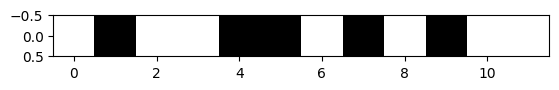

In [165]:
from matplotlib import pyplot as plt
plt.imshow(gameMap.map, interpolation='nearest')
plt.gray()
plt.show()